- Emma Rey Sánchez - 202110801
- Catalina Royo-Villanova Seguí - 202104665
# Proyecto Final

## Calibración de la cámara

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [22]:
def encontrar_matches(img1, img2):
    # Initiate SIFT detector
    sift = cv.SIFT_create()
    # find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)
    # BFMatcher with default params
    bf = cv.BFMatcher()
    matches = bf.knnMatch(des1,des2,k=2)
    # Apply ratio test
    good = []
    for m,n in matches:
        if m.distance < 0.60*n.distance:
            good.append([m])
    return good

In [30]:
def objeto_en_frame(frame, templates):
    matriz_matches = list()
    for i in range(len(templates)):
        matriz_matches.append([i, encontrar_matches(frame, templates[i])])
    matches = list()
    producto = -1
    for i in matriz_matches:
        print(len(i[1]))
        if len(matches) < len(i[1]) and len(i[1]) > 20:
            matches = i[1]
            producto = i[0]
    return producto, matches

In [ ]:
def pintar_rectangulo(img, producto, matches, templates):
    objeto = templates[producto]
    


In [32]:
imgN = cv.imread('ImagenesObjetos/Nutella.jpg',cv.IMREAD_GRAYSCALE)
imgM = cv.imread('ImagenesObjetos/Mermelada.jpg',cv.IMREAD_GRAYSCALE)
imgC = cv.imread('ImagenesObjetos/Cacahuete.jpg',cv.IMREAD_GRAYSCALE)
fotos = [imgN, imgM, imgC]

img2 = cv.imread('Imagen_cacahuete2.jpg',cv.IMREAD_GRAYSCALE)

objeto_en_frame(img2, fotos)

0
0
36


(2,
 [[< cv2.DMatch 0x7f666f5e70>],
  [< cv2.DMatch 0x7f666f5f90>],
  [< cv2.DMatch 0x7f666f5070>],
  [< cv2.DMatch 0x7f7415ec90>],
  [< cv2.DMatch 0x7f7415eaf0>],
  [< cv2.DMatch 0x7f7415e9d0>],
  [< cv2.DMatch 0x7f7415ec50>],
  [< cv2.DMatch 0x7f7415ec30>],
  [< cv2.DMatch 0x7f7415eab0>],
  [< cv2.DMatch 0x7f762da390>],
  [< cv2.DMatch 0x7f762da4d0>],
  [< cv2.DMatch 0x7f66787e50>],
  [< cv2.DMatch 0x7f66787f30>],
  [< cv2.DMatch 0x7f666b7c90>],
  [< cv2.DMatch 0x7f666b7a10>],
  [< cv2.DMatch 0x7f666b71f0>],
  [< cv2.DMatch 0x7f666b7310>],
  [< cv2.DMatch 0x7f666b7350>],
  [< cv2.DMatch 0x7f666b7390>],
  [< cv2.DMatch 0x7f666b7410>],
  [< cv2.DMatch 0x7f666b7450>],
  [< cv2.DMatch 0x7f666b7490>],
  [< cv2.DMatch 0x7f666b74d0>],
  [< cv2.DMatch 0x7f666b75f0>],
  [< cv2.DMatch 0x7f666b7630>],
  [< cv2.DMatch 0x7f666b7670>],
  [< cv2.DMatch 0x7f666b7850>],
  [< cv2.DMatch 0x7f666b7890>],
  [< cv2.DMatch 0x7f666b79b0>],
  [< cv2.DMatch 0x7f666b7b50>],
  [< cv2.DMatch 0x7f666b7bd0>],
  [<

In [ ]:
def contar_objetos(calibration_file):
    # Conectamos la camara y la configuramos
    picam = Picamera2()
    picam.preview_configuration.main.size = (500, 300)
    picam.preview_configuration.main.format = "RGB888"
    picam.preview_configuration.align()
    picam.configure("preview")
    picam.start()
    imagenes = list()
    combinacion_correcta = False
    # Cargar parámetros de calibración
    camera_matrix, dist_coeffs = load_calibration_params(calibration_file)
    while True:
        frame = picam.capture_array()
        # Corregimos la distorsión
        undistorted_frame = undistort_image(frame, camera_matrix, dist_coeffs)
        cv2.imshow("picam", undistorted_frame)
        key = cv2.waitKey(1) & 0xFF
        if key == ord(' '):
            # Mandar imagen
            print(establecer_color(undistorted_frame))
            imagenes.append(undistorted_frame)
            if len(imagenes) == 6:
                combinacion_correcta = verificar_combinacion(imagenes)
                imagenes = list()
        if combinacion_correcta:
            break

60


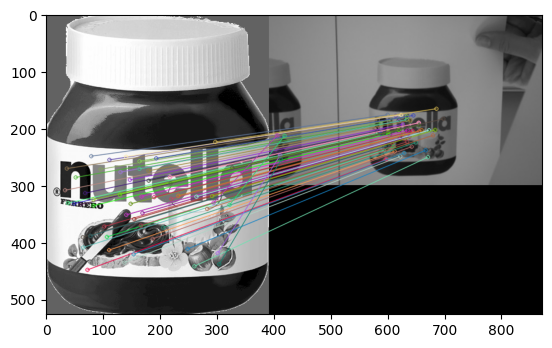

In [18]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('ImagenesObjetos/Nutella.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('Imagen_nutella1.jpg',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.60*n.distance:
        good.append([m])

print(len(good))
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3)
plt.show()

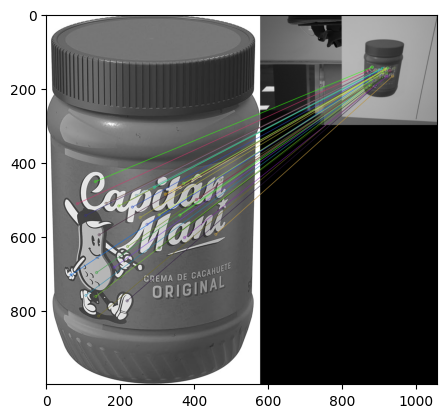

In [9]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('ImagenesObjetos/Cacahuete.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('Imagen_cacahuete2.jpg',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.60*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3)
plt.show()

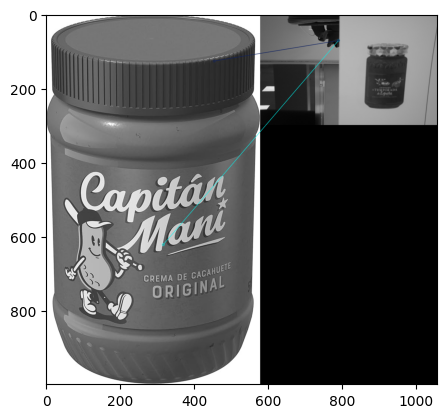

In [12]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('ImagenesObjetos/Cacahuete.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('Imagen_mermelada1.jpg',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.60*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3)
plt.show()

In [14]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread('ImagenesObjetos/Nutella.jpg', cv.IMREAD_GRAYSCALE)  # queryImage
img2 = cv.imread('Imagen_nutella1.jpg', cv.IMREAD_GRAYSCALE)  # trainImage

# Initiate SIFT detector
sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
good = []
for m, n in matches:
    if m.distance < 0.60 * n.distance:
        good.append(m)

# Extracting coordinates from keypoints in src_pts
src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)

# Draw bounding box around the detected object
if len(good) > 10:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    h, w = img1.shape
    pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)



    # Find the homography matrix
    M, mask = cv.findHomography(src_pts, pts, cv.RANSAC, 5.0)

    # Apply the perspective transform to get the bounding box corners in the image2 coordinates
    dst_pts = cv.perspectiveTransform(pts, M)

    # Draw the bounding box
    img2 = cv.polylines(img2, [np.int32(dst_pts)], True, 255, 2, cv.LINE_AA)

# Display the result
plt.imshow(img2), plt.show()


error: OpenCV(4.8.1) /io/opencv/modules/calib3d/src/fundam.cpp:389: error: (-215:Assertion failed) src.checkVector(2) == dst.checkVector(2) in function 'findHomography'
